# Funciones y módulos

## Ejemplos de funciones

Anteriormente vimos cómo utilizar funciones (ya definidas como en el caso de `print()`, `len()`, etc), y cómo definir funciones propias para después utilizarlas.

En particular, vimos que en Python las funciones son objetos, y por lo tanto pueden ser argumentos de funciones, o pueden ser retornados por otras funciones. 

### Ejemplo 05-1: Funciones como argumentos de otras funciones

Veamos en más detalle esto, estudiando un caso de uso. Le pasamos como argumento una función a un integrador:

In [1]:
# %load scripts/ejemplo_05_1.py
def integrate_simps(f, a, b, N=10):
  """Calcula numéricamente la integral de la función en el intervalo dado
  utilizando la regla de Simpson

  Keyword Arguments:
  f -- Función a integrar
  a -- Límite inferior
  b -- Límite superior
  N -- El intervalo se separa en 2*N intervalos
  """
  h = (b - a) / (2 * N)
  I = f(a) - f(b)
  for j in range(1, N + 1):
    x2j = a + 2 * j * h
    x2jm1 = a + (2 * j - 1) * h
    I += 2 * f(x2j) + 4 * f(x2jm1)
  return I * h / 3


En este ejemplo programamos la fórmula de integración de Simpson para obtener la integral de una función `f(x)` provista por el usuario, en un dado intervalo:
$$
\int _{a}^{b}f(x)\,dx\approx \frac{h}{3} \bigg[ f(x_{0}) + 2 \sum_{j=1}^{n/2} f(x_{2j}) + 4 \sum_{j=1}^{n/2} f(x_{2j-1}) - f(x_{n})\bigg]
$$
¿Cómo usamos la función de integración?

In [2]:
def potencia2(x):
  return x**2

integrate_simps(potencia2, 0, 3, 7)

9.0

Acá definimos una función, y se la pasamos como argumento a la función de integración. Veamos otro ejemplo similar

In [3]:
print('Integrales:')
for n in range(6):
  I = integrate_simps(lambda x: (n + 1) * x**n, 0, 3, 10)
  print('I ( {} x^{}, 0, 3) = {:.5f}'.format(n + 1, n, I))


Integrales:
I ( 1 x^0, 0, 3) = 3.00000
I ( 2 x^1, 0, 3) = 9.00000
I ( 3 x^2, 0, 3) = 27.00000
I ( 4 x^3, 0, 3) = 81.00000
I ( 5 x^4, 0, 3) = 243.00101
I ( 6 x^5, 0, 3) = 729.00911


In [ ]:
lambda x,y:  (x,y,x+y) )

def suma(x,y):
    return x,y,x+y

Este es un ejemplo de uso de las funciones anónimas `lambda`. Recordemos que la forma de las funciones `lambda` es:
```python
lambda x: manipular(x)
```
por ejemplo en el ejemplo anterior, para calcular $(n+1) x^n$, hicimos:
```python
lambda x: (n+1) * x**n
```

## Ejemplo 05-2

Veamos ahora una función que retorna una función. Supongamos que tenemos una tabla de puntos (x,y) por los que pasan nuestros datos y queremos interpolar los datos con un polinomio.

Sabemos que dados N puntos, hay un único polinomio de grado N que pasa por todos los puntos. En este ejemplo utilizamos la fórmula de Lagrange para obtenerlo.

In [ ]:
%load scripts/ejemplo_05_2.py

In [9]:
# %load scripts/ejemplo_05_2.py
def polinomio_interp(x, y):
  """Devuelve el polinomio interpolador que pasa por los puntos (x_i, y_i)

    Warning: La implementación es numéricamente inestable. Funciona para algunos puntos (menor a 20)

  Keyword Arguments:
  x -- Lista con los valores de x
  y -- Lista con los valores de y
  """

  M = len(x)

  def polin(xx):
    """Evalúa el polinomio interpolador de Lagrange"""
    P = 0

    for j in range(M):
      pt = y[j]
      for k in range(M):
        if k == j:
          continue
        fac = x[j] - x[k]
        pt *= (xx - x[k]) / fac
      P += pt
    return P

  return polin


Lo que obtenemos al llamar a esta función es una función

In [10]:
f = polinomio_interp([0,1], [0,2])

In [11]:
f

<function __main__.polinomio_interp.<locals>.polin>

In [12]:
help(f)

Help on function polin in module __main__:

polin(xx)
    Evalúa el polinomio interpolador de Lagrange



In [14]:
f(3.4)

6.8

Este es el resultado esperado porque queremos el polinomio que pasa por dos puntos (una recta), y en este caso es la recta $y = 2x$. Veamos cómo usarlo, en forma más general:

In [16]:
# %load scripts/ejemplo_05_3
#from ejemplo_05_2 import polinomio_interp

xmax = 5
step = 0.2
N = int(5 / step)

x2, y2 = [1, 2, 3], [1, 4, 9]   # x^2
f2 = polinomio_interp(x2, y2)

x3, y3 = [0, 1, 2, 3], [0, 2, 16, 54]  # 2 x^3
f3 = polinomio_interp(x3, y3)

print('\n x   f2(x)   f3(x)\n' + 18 * '-')
for j in range(N):
  x = step * j
  print('{:.1f}  {:5.2f}  {:6.2f}'.format(x, f2(x), f3(x)))



 x   f2(x)   f3(x)
------------------
0.0   0.00    0.00
0.2   0.04    0.02
0.4   0.16    0.13
0.6   0.36    0.43
0.8   0.64    1.02
1.0   1.00    2.00
1.2   1.44    3.46
1.4   1.96    5.49
1.6   2.56    8.19
1.8   3.24   11.66
2.0   4.00   16.00
2.2   4.84   21.30
2.4   5.76   27.65
2.6   6.76   35.15
2.8   7.84   43.90
3.0   9.00   54.00
3.2  10.24   65.54
3.4  11.56   78.61
3.6  12.96   93.31
3.8  14.44  109.74
4.0  16.00  128.00
4.2  17.64  148.18
4.4  19.36  170.37
4.6  21.16  194.67
4.8  23.04  221.18


In [17]:
%matplotlib inline

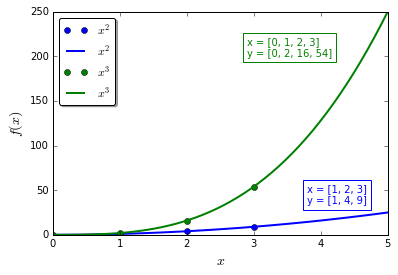

In [18]:
# %load scripts/ejemplo_05_4
import numpy as np
import matplotlib.pyplot as plt
#from ejemplo_05_2 import polinomio_interp

# -------------------- Definición de las funciones --------------------
x2, y2 = [1, 2, 3], [1, 4, 9]
f2 = polinomio_interp(x2, y2)

x3, y3 = [0, 1, 2, 3], [0, 2, 16, 54]
f3 = polinomio_interp(x3, y3)

# ---------------------------- Graficación ----------------------------
plt.ion()
plt.clf()

xx = np.linspace(0, 5, 50)

plt.plot(x2, y2, 'ob', xx, f2(xx), label='$x^2$')
plt.plot(x3, y3, 'og', xx, f3(xx), label='$x^3$')

# Agregamos el texto
plt.text(3.8, 35, 'x = {}\ny = {}'.format(str(x2), str(y2)),
         color='b', bbox={'facecolor': 'none', 'edgecolor': 'blue'})
plt.text(2.9, 200, 'x = {}\ny = {}'.format(str(x3), str(y3)),
         color='g', bbox={'facecolor': 'none', 'edgecolor': 'green'})

# Texto a ejes y leyenda
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(loc='best')


In [ ]:
# %load scripts/ejemplo_05_4
import numpy as np
import matplotlib.pyplot as plt
#from ejemplo_05_2 import polinomio_interp

#plt.ion()
#plt.clf()

x2 = [1, 2, 3]
y2 = [1, 4, 9]
f2 = polinomio_interp(x2, y2)

x3, y3 = [0, 1, 2, 3], [0, 2, 16, 54]
f3 = polinomio_interp(x3, y3)


xx = np.linspace(0, 5, 50)

plt.plot(x2, y2, 'ob', xx, f2(xx))
plt.plot(x3, y3, 'og', xx, f3(xx))
plt.text(3.8, 35, 'x = {}\ny = {}'.format(str(x2), str(y2)),
         color='b', bbox={'facecolor': 'none', 'edgecolor': 'blue'})

plt.text(2.9, 200, 'x = {}\ny = {}'.format(str(x3), str(y3)),
         color='g', bbox={'facecolor': 'none', 'edgecolor': 'green'})

plt.xlabel('$x$')
plt.ylabel('$f(x)$')


En estos últimos dos ejemplos, y en particular en el último, estamos usando funciones que no definimos. Las funciones de graficación entre otras, están definidas en un paquete externo `matplotlib`. Para poder utilizar las funciones debemos primero *importar* el módulo donde están definidas.

Lo mismo ocurre con nuestro programa. Veamos en más detalle cómo es el mecanismo de importación.